In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
train_data = pd.read_csv("trained.csv")
test_data = pd.read_csv("tested.csv")

In [101]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
Pclass             418 non-null int64
Sex                418 non-null int64
Age                418 non-null int32
SibSp              418 non-null int64
Parch              418 non-null int64
Fare               418 non-null int32
Embarked           418 non-null int64
relatives          418 non-null int64
not_alone          418 non-null int32
Deck               418 non-null int32
Title              418 non-null int64
Age_Class          418 non-null int64
Fare_Per_Person    418 non-null int32
dtypes: int32(5), int64(8)
memory usage: 34.4 KB


In [72]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}

combine = [train_data, test_data]
for dataset in combine:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)

train_data.drop('PassengerId', axis=1, inplace=True)
test_data.drop('PassengerId', axis=1, inplace=True)

combine = [train_data, test_data]
for dataset in combine:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)# we can now drop the cabin feature
train_data = train_data.drop(['Cabin'], axis=1)
test_data = test_data.drop(['Cabin'], axis=1)

combine = [train_data, test_data]
for dataset in combine:
    mean = train_data["Age"].mean()
    std = test_data["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_data["Age"].astype(int)

common_value = 'S'
combine = [train_data, test_data]
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

    
combine = [train_data, test_data] 
for dataset in combine:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

combine = [train_data, test_data]    
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in combine:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr','Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
train_data = train_data.drop(['Name'], axis=1)
test_data = test_data.drop(['Name'], axis=1)

genders = {"male": 0, "female": 1}
combine = [train_data, test_data] 
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map(genders)

train_data = train_data.drop(['Ticket'], axis=1)
test_data = test_data.drop(['Ticket'], axis=1)

ports = {"S": 0, "C": 1, "Q": 2}
combine = [train_data, test_data] 
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

combine = [train_data, test_data]
for dataset in combine:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6
    dataset['Age'] = dataset['Age'].astype(int)
    
combine = [train_data, test_data]
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

combine = [train_data, test_data]
for dataset in combine:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']

combine = [train_data, test_data]
for dataset in combine:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)

In [73]:
X_train = train_data.drop("Survived", axis=1)
y_train = train_data["Survived"]
X_test  = test_data

In [77]:
y_train.shape

(891,)

In [75]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

from sklearn.preprocessing import OneHotEncoder

cat_pipeline = Pipeline([
        ("select_cat", DataFrameSelector(["Pclass", "Sex", "Embarked", "Age","Deck","Title","Fare","not_alone"])),
        ("cat_encoder", OneHotEncoder(sparse=False)),
    ])

In [199]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
Pclass             418 non-null int64
Sex                418 non-null int64
Age                418 non-null int32
SibSp              418 non-null int64
Parch              418 non-null int64
Fare               418 non-null int32
Embarked           418 non-null int64
relatives          418 non-null int64
not_alone          418 non-null int32
Deck               418 non-null int32
Title              418 non-null int64
Age_Class          418 non-null int64
Fare_Per_Person    418 non-null int32
dtypes: int32(5), int64(8)
memory usage: 34.4 KB


In [76]:
X_train = cat_pipeline.fit_transform(X_train)
X_test = cat_pipeline.transform(X_test)

C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [27]:
import lightgbm as lgb
from sklearn import svm, tree, linear_model, neighbors, ensemble, discriminant_analysis

In [80]:
MLA = [
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    linear_model.LogisticRegressionCV(),
    linear_model.RidgeClassifierCV(),
    
    neighbors.KNeighborsClassifier(),
    
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    discriminant_analysis.LinearDiscriminantAnalysis(),

    lgb.LGBMClassifier()
    ]

In [81]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_validate

split = StratifiedShuffleSplit(n_splits=10,test_size=0.3, train_size=0.6, random_state=42)
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)
MLA_predict = pd.DataFrame()
MLA_predict['real'] = y_train

row_index = 0
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = cross_validate(alg, X_train, y_train, cv  = split)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    

    #save MLA predictions - see section 6 for usage
    alg.fit(X_train,y_train)
    MLA_predict[MLA_name] = alg.predict(X_train)
    
    row_index+=1
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare

C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-pa

C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in ver

C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\skle

,MLA Name,MLA Parameters,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
3,GradientBoostingClassifier,"{'criterion': 'friedman_mse', 'init': None, 'l...",0.822015,0.0775626,0.0993552
6,RidgeClassifierCV,"{'alphas': array([ 0.1, 1. , 10. ]), 'class_w...",0.819776,0.0706289,0.0026382
13,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",0.818284,0.0770764,0.0384995
5,LogisticRegressionCV,"{'Cs': 10, 'class_weight': None, 'cv': 'warn',...",0.815299,0.0793514,0.278114
12,LinearDiscriminantAnalysis,"{'n_components': None, 'priors': None, 'shrink...",0.813433,0.0559701,0.00535653
2,ExtraTreesClassifier,"{'bootstrap': False, 'class_weight': None, 'cr...",0.808582,0.0513097,0.0147265
7,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.808209,0.0921997,0.00144162
4,RandomForestClassifier,"{'bootstrap': True, 'class_weight': None, 'cri...",0.806343,0.098157,0.0119699
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.804851,0.0810389,0.015442
9,NuSVC,"{'cache_size': 200, 'class_weight': None, 'coe...",0.800373,0.072069,0.0760064


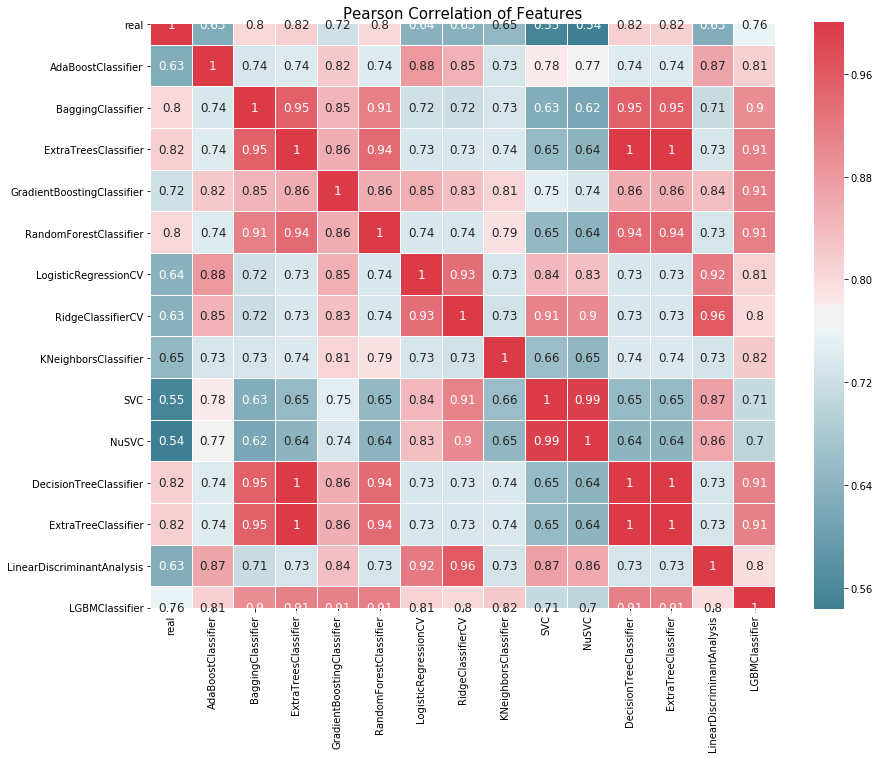

In [83]:
import seaborn as sns
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)
correlation_heatmap(MLA_predict)

In [86]:
vote_est = [
    ('ada', ensemble.AdaBoostClassifier()),
    ('bc', ensemble.BaggingClassifier()),
    ('etc',ensemble.ExtraTreesClassifier()),
    ('gbc', ensemble.GradientBoostingClassifier()),
    ('rfc', ensemble.RandomForestClassifier()),

    #GLM: http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
    ('lr', linear_model.LogisticRegressionCV()),
    
    #Nearest Neighbor: http://scikit-learn.org/stable/modules/neighbors.html
    ('knn', neighbors.KNeighborsClassifier()),
    
    #SVM: http://scikit-learn.org/stable/modules/svm.html
    ('svc', svm.SVC(probability=True)),
    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
   ('lgb', lgb.LGBMClassifier())

]

vote_soft = ensemble.VotingClassifier(estimators = vote_est , voting = 'soft')
vote_soft_cv = cross_validate(vote_soft, X_train ,y_train, cv  = split)
vote_soft.fit(X_train,y_train)

print("Soft Voting Test w/bin score mean: {:.2f}". format(vote_soft_cv['test_score'].mean()*100))
print("Soft Voting Test w/bin score 3*std: +/- {:.2f}". format(vote_soft_cv['test_score'].std()*100*3))
print('-'*10)

C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\

C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\

C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarnin

Soft Voting Test w/bin score mean: 82.16
Soft Voting Test w/bin score 3*std: +/- 7.16
----------


In [99]:
import time
from sklearn.model_selection import GridSearchCV
grid_n_estimator = [50, 200, 400, 600]
grid_ratio = [.1, .01, .001, .5, 1.0]
grid_learn = [.003, .007, .01, .05]
grid_max_depth = [5, 8, 10, 15, None]
grid_min_samples = [5, 10, .05, .10]
grid_criterion = ['gini', 'entropy']
grid_bool = [True, False]
grid_seed = [0]


grid_param = [
            [{
            'n_estimators': grid_n_estimator, #default=50
            'learning_rate': grid_learn, #default=1
            'random_state': grid_seed
            }],
       
    
            [{
            'n_estimators': grid_n_estimator,
            'max_samples': [.3,.7,1.0], 
            'random_state': grid_seed
             }],

    
            [{
            'n_estimators': grid_n_estimator, #default=10
            'criterion': grid_criterion, #default=”gini”
            'max_depth': grid_max_depth, #default=None
            'random_state': grid_seed
             }],


            [{
            'learning_rate': grid_learn, 
            'n_estimators': grid_n_estimator,
            'max_depth': grid_max_depth, #default=3   
            'random_state': grid_seed
             }],

    
            [{
            
            'n_estimators': grid_n_estimator, #default=10
            'criterion': grid_criterion, #default=”gini”
            'max_depth': grid_max_depth, #default=None
            'oob_score': [True], 
            'random_state': grid_seed
             }],
        
    
            [{
            #LogisticRegressionCV - http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html#sklearn.linear_model.LogisticRegressionCV
            'fit_intercept': grid_bool, 
            #'penalty': ['l1','l2'],
            'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], #default: lbfgs
            'random_state': grid_seed
             }],

            [{
            'n_neighbors': [1,3,5,7], #default: 5
            'weights': ['uniform', 'distance'], 
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
            }],
            
            [{
            'C': [50,100,200,300,500], #default=1.0
            'gamma': grid_ratio,
            'decision_function_shape': ['ovo', 'ovr'],
            'probability': [True],
            'random_state': grid_seed
             }],

    
            [{
            'learning_rate': grid_learn, 
            'max_depth': grid_max_depth, 
            'n_estimators': grid_n_estimator, 
            'seed': grid_seed  
             }]   
        ]
start_total = time.perf_counter()
for clf, param in zip (vote_est, grid_param): #https://docs.python.org/3/library/functions.html#zip

    start = time.perf_counter()        
    best_search = GridSearchCV(estimator = clf[1], param_grid = param, cv = split, scoring = 'roc_auc')
    best_search.fit(X_train, y_train)
    run = time.perf_counter() - start

    best_param = best_search.best_params_
    print('The best parameter for {} is {} with a runtime of {:.2f} seconds.'.format(clf[1].__class__.__name__, best_param, run))
    clf[1].set_params(**best_param) 


run_total = time.perf_counter() - start_total
print('Total optimization time was {:.2f} minutes.'.format(run_total/60))

print('-'*10)

The best parameter for AdaBoostClassifier is {'learning_rate': 0.05, 'n_estimators': 200, 'random_state': 0} with a runtime of 50.88 seconds.
The best parameter for BaggingClassifier is {'max_samples': 0.3, 'n_estimators': 600, 'random_state': 0} with a runtime of 41.62 seconds.
The best parameter for ExtraTreesClassifier is {'criterion': 'gini', 'max_depth': 8, 'n_estimators': 50, 'random_state': 0} with a runtime of 94.60 seconds.
The best parameter for GradientBoostingClassifier is {'learning_rate': 0.003, 'max_depth': 5, 'n_estimators': 600, 'random_state': 0} with a runtime of 857.60 seconds.
The best parameter for RandomForestClassifier is {'criterion': 'entropy', 'max_depth': 8, 'n_estimators': 200, 'oob_score': True, 'random_state': 0} with a runtime of 108.50 seconds.


C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.

C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: 

C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\model_selection\_spl

C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\sag.py:

C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Gyu\Anaconda3\envs\py37\lib\s

C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The

C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\model_selection\_spl

C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\sag.py:

The best parameter for LogisticRegressionCV is {'fit_intercept': False, 'random_state': 0, 'solver': 'saga'} with a runtime of 16.31 seconds.
The best parameter for KNeighborsClassifier is {'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'uniform'} with a runtime of 2.14 seconds.
The best parameter for SVC is {'C': 50, 'decision_function_shape': 'ovo', 'gamma': 0.01, 'probability': True, 'random_state': 0} with a runtime of 31.10 seconds.
The best parameter for LGBMClassifier is {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 50, 'seed': 0} with a runtime of 50.96 seconds.
Total optimization time was 20.90 minutes.
----------


In [100]:
grid_hard = ensemble.VotingClassifier(estimators = vote_est , voting = 'hard')
grid_hard_cv = cross_validate(grid_hard, X_train, y_train, cv  = split)
grid_hard.fit(X_train, y_train)

print("Hard Voting w/Tuned Hyperparameters Test w/bin score mean: {:.2f}". format(grid_hard_cv['test_score'].mean()*100))
print("Hard Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- {:.2f}". format(grid_hard_cv['test_score'].std()*100*3))
print('-'*10)

#Soft Vote or weighted probabilities w/Tuned Hyperparameters
grid_soft = ensemble.VotingClassifier(estimators = vote_est , voting = 'soft')
grid_soft_cv = cross_validate(grid_soft, X_train, y_train, cv  = split)
grid_soft.fit(X_train, y_train)

print("Soft Voting w/Tuned Hyperparameters Test w/bin score mean: {:.2f}". format(grid_soft_cv['test_score'].mean()*100))
print("Soft Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- {:.2f}". format(grid_soft_cv['test_score'].std()*100*3))
print('-'*10)


C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\model_selection\_spl

C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\model_selection\_spl

Hard Voting w/Tuned Hyperparameters Test w/bin score mean: 82.31
Hard Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- 6.07
----------


C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\model_selection\_spl

C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\model_selection\_spl

Soft Voting w/Tuned Hyperparameters Test w/bin score mean: 82.43
Soft Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- 5.47
----------


In [102]:
data_val = pd.DataFrame()
data_val['Survived'] = grid_hard.predict(X_test)
data_val.to_csv('submit.csv')

In [103]:
data_val = pd.DataFrame()
data_val['Survived'] = grid_soft.predict(X_test)
data_val.to_csv('submit2.csv')

In [10]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier()
forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=10)
forest_scores.mean()


C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-pa

0.8081094654409261

Text(0, 0.5, '정확도')

C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\matplotlib\backends\backend_agg.py:180

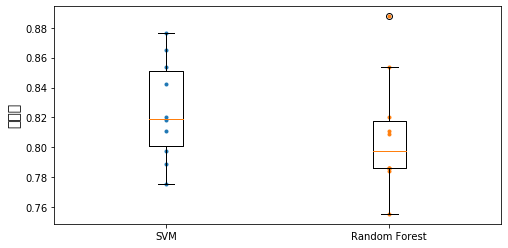

In [14]:
plt.figure(figsize=(8, 4))
plt.plot([1]*10, svm_scores, ".")
plt.plot([2]*10, forest_scores, ".")
plt.boxplot([svm_scores, forest_scores], labels=("SVM","Random Forest"))
plt.ylabel("정확도", fontsize=14)


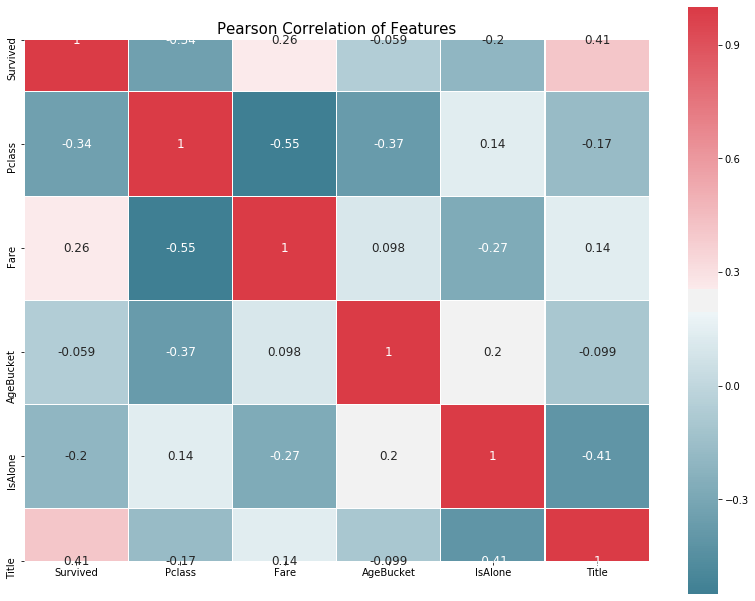

In [15]:
import seaborn as sns
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(train_data)

In [15]:
from sklearn.ensemble import GradientBoostingClassifier

gbk_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbk_scores = cross_val_score(gbk_clf, X_train, y_train, cv=10)
gbk_scores.mean()


0.8126798887753944

In [16]:
random_forest = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
random_forest.fit(X_train, y_train)
random_forest.score(X_train,y_train)

0.9135802469135802

In [282]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Title,0.205
Sex,0.169
Age_Class,0.096
Deck,0.086
Pclass,0.076
Age,0.076
Fare,0.065
relatives,0.056
Embarked,0.053


In [17]:
ran_scores = cross_val_score(random_forest,X_train,y_train,cv=10)
ran_scores.mean()

0.8171617864033595

In [22]:
from sklearn.model_selection import GridSearchCV

param_grid = {'kernel': ['linear','rbf'], 
              'class_weight': [None,'balanced'],
              'degree': [1,3,5,7],
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

modelsvm = GridSearchCV(svm_clf,param_grid = param_grid, cv=5, 
                        scoring="accuracy", verbose = 1)
modelsvm.fit(X_train,y_train)

Fitting 5 folds for each of 448 candidates, totalling 2240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2240 out of 2240 | elapsed:  3.6min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=200, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3, gamma=0.01,
                           kernel='rbf', max_iter=-1, probability=False,
                           random_state=None, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 10, 50, 100, 200, 300, 1000],
                         'class_weight': [None, 'balanced'],
                         'degree': [1, 3, 5, 7], 'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [23]:
final_model = modelsvm.best_estimator_
final_score = cross_val_score(final_model, X_train, y_train, cv=10)
final_score.mean()

0.8227672795369425

In [24]:
y_pred = final_model.predict(X_test)

In [26]:
df= pd.DataFrame(y_pred)
df.to_csv("result.csv")